# Predicting 1D Poisson Equations with Fourier Neural Operators
We will be predicting the 1D Poisson equation, given by 
$$\nabla^2 \psi = f$$
where $\psi$ and $f$ are functions ( real or complex-valued ) defined over a manifold. Generally, $f$ is given and $\psi$ is what we aim to solve for. Clearly, we have a function input ($f$) and a function output ($\psi$). This is a perfect use case for neural operators! We can train a Fourier neural operator, which once trained, will be the operator $$\mathcal{G} : f \to \psi$$

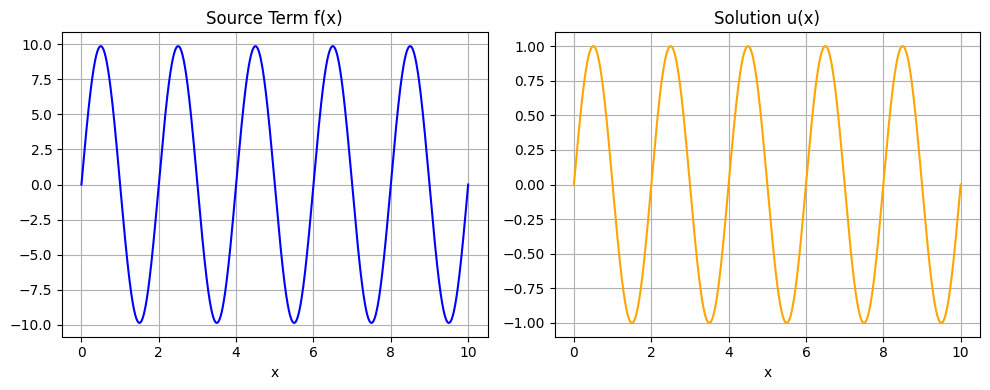

In [1]:
import torch
import matplotlib.pyplot as plt

# Domain
x = torch.linspace(0, 10, 10000)

# Exact source and solution
f = (torch.pi**2) * torch.sin(torch.pi * x)
u = torch.sin(torch.pi * x)

# Plot
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, f, label='f(x)', color='blue')
plt.title("Source Term f(x)")
plt.xlabel("x")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, u, label='u(x)', color='orange')
plt.title("Solution u(x)")
plt.xlabel("x")
plt.grid(True)

plt.tight_layout()
plt.show()

In [2]:
from neurop.fno import FNO1D

f = f.view(1, -1, 1)
u = u.view(1, -1, 1)

train_f, test_f = f[:8000], f[8000:]
train_u, test_u = u[:8000], u[8000:]

model = FNO1D(modes=16, width=32)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to_device(device)

train_f = train_f.to(device)
train_u = train_u.to(device)

for epoch in range(2000):
    loss = model.train_step(train_f, train_u)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")


Epoch 0, Loss: 103.300636
Epoch 10, Loss: 11.142481
Epoch 20, Loss: 5.238363
Epoch 30, Loss: 1.072455
Epoch 40, Loss: 0.476304
Epoch 50, Loss: 0.321969
Epoch 60, Loss: 0.131603
Epoch 70, Loss: 0.078274
Epoch 80, Loss: 0.056797
Epoch 90, Loss: 0.038722
Epoch 100, Loss: 0.032084
Epoch 110, Loss: 0.026575
Epoch 120, Loss: 0.022259
Epoch 130, Loss: 0.018951
Epoch 140, Loss: 0.016334
Epoch 150, Loss: 0.014230
Epoch 160, Loss: 0.012503
Epoch 170, Loss: 0.011063
Epoch 180, Loss: 0.009853
Epoch 190, Loss: 0.008839
Epoch 200, Loss: 0.007997
Epoch 210, Loss: 0.007301
Epoch 220, Loss: 0.006726
Epoch 230, Loss: 0.006242
Epoch 240, Loss: 0.005825
Epoch 250, Loss: 0.005464
Epoch 260, Loss: 0.005148
Epoch 270, Loss: 0.004868
Epoch 280, Loss: 0.004619
Epoch 290, Loss: 0.004395
Epoch 300, Loss: 0.004193
Epoch 310, Loss: 0.004010
Epoch 320, Loss: 0.003845
Epoch 330, Loss: 0.003695
Epoch 340, Loss: 0.003556
Epoch 350, Loss: 0.003426
Epoch 360, Loss: 0.003304
Epoch 370, Loss: 0.003191
Epoch 380, Loss: 0.0

Let's test how good the prediction is.

In [6]:
x = torch.linspace(0, 10, 10000)

f = (torch.pi**2) * torch.sin(torch.pi * x)

u_ground = torch.sin(torch.pi * x)

f = f.view(1, -1, 1)

model.eval() 

with torch.no_grad():
    u_pred = model(f)

u_pred = u_pred.squeeze().cpu()
f = f.squeeze().cpu()

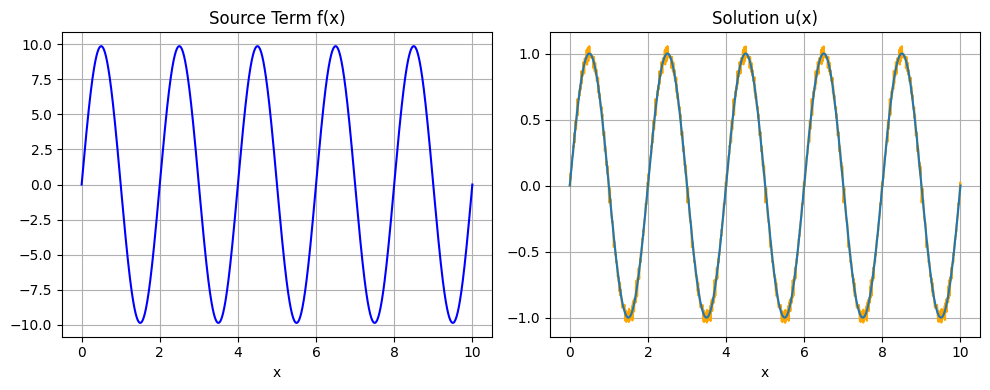

In [7]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x, f, label='f(x)', color='blue')
plt.title("Source Term f(x)")
plt.xlabel("x")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, u_pred, label='u(x)', color='orange')
plt.plot(x, u_ground)
plt.title("Solution u(x)")
plt.xlabel("x")
plt.grid(True)

plt.tight_layout()
plt.show()